In [7]:
!pip install kagglehub 
!pip install scikit-learn
!pip install nltk
!pip install WordCloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


# Import Dataset

In [8]:
df_summary = 0

In [9]:
df_score = 0

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                            

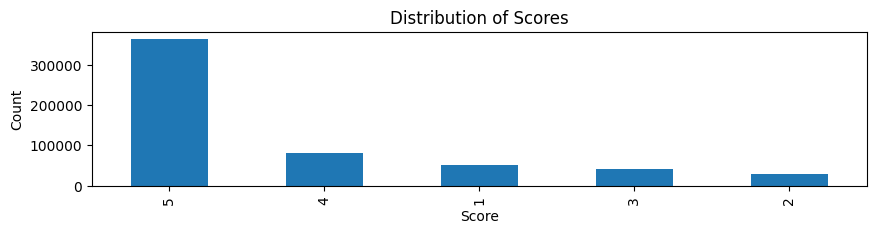

Score: 5 - Summary: smooth and robust
Score: 5 - Summary: Great taste
Score: 1 - Summary: yuck
Score: 3 - Summary: The taste is overpowering and lingers on your tongue!
Score: 5 - Summary: My Favorite German Bread
Score: 5 - Summary: Water in a box
Score: 4 - Summary: Dog loved it but left a mess
Score: 5 - Summary: My dog loves these !
Score: 2 - Summary: POTATO CHIPS
Score: 5 - Summary: Great oatmeal!
After lowercase transformation:
Score: 5 - Summary: yum, yum....
Score: 5 - Summary: real nice coffee!
Score: 2 - Summary: does this product contain bovine growth hormone (bgh)!??
Score: 5 - Summary: packing a lunch just got better
Score: 3 - Summary: we had a problem with this
Score: 5 - Summary: yummy
Score: 5 - Summary: great sugar-free product!
Score: 3 - Summary: healthy but
Score: 3 - Summary: keep some water handy
Score: 5 - Summary: my daughter loved these from 7 months until 2 years old
Before: http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title
After:  URL

Be

KeyboardInterrupt: 

KeyboardInterrupt: 

In [10]:
# This code is downloading the notebook from GitHub and running it
import requests
from pathlib import Path
url = "https://raw.githubusercontent.com/nbakas/NLP/refs/heads/main/02-Preprocessing.ipynb"
filename = url.split("/")[-1]
local_path = Path.cwd() / filename
if not local_path.exists():
    response = requests.get(url)
    response.raise_for_status()
    local_path.write_bytes(response.content)
%run $local_path

In [ ]:
df_summary

0               good quality dog food
1                       not advertise
2                         delight say
3                      cough medicine
4                         great taffy
                     ...             
568449                    not without
568450                   disappointed
568451               perfect maltipoo
568452    favorite train reward treat
568453                    great honey
Name: Summary, Length: 568454, dtype: object

In [ ]:
df_score

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64

# Embeddings

## TF-IDF

In [11]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_summary, df_score, test_size=0.2, random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=384,  # Limit features to reduce dimensionality
    min_df=5,           # Minimum document frequency
    max_df=0.8,         # Maximum document frequency (ignore terms that appear in >80% of documents)
    stop_words='english'
)

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(X_train)

In [13]:
X_train[:5].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
import numpy as np
np.mean(X_train.toarray())

: 

In [ ]:
import random

# Get the number of rows in X_train
num_rows = X_train.shape[0]

# Generate 10 random indices
random_indices = random.sample(range(num_rows), 10)

# Print 10 random lines of X_train
for idx in random_indices:
    print(f"Index: {idx}, Mean: {np.mean(X_train[idx].toarray()[0], axis=0)}")

In [ ]:
# Transform the test data
X_test = tfidf_vectorizer.transform(X_test)

In [ ]:
# Display the shape of the TF-IDF matrices
print(f"Training TF-IDF matrix shape: {X_train.shape}")
print(f"Testing TF-IDF matrix shape: {X_test.shape}")

In [ ]:
# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Number of features (words): {len(feature_names)}")
print(f"Features: {feature_names}")

In [ ]:
# Most frequent words
import numpy as np
import pandas as pd

# Get the sum of TF-IDF values for each term across all documents
tfidf_means = np.array(X_train.mean(axis=0)).flatten()

# Create a DataFrame with terms and their TF-IDF sums
term_importance = pd.DataFrame({
    'term': feature_names,
    'tfidf_mean': tfidf_means
})

# Sort by importance (TF-IDF sum)
term_importance = term_importance.sort_values('tfidf_mean', ascending=False)

# Display the top 10 most important terms
print("Top 10 most important terms:")
print(term_importance.head(10))

## Word2Vec

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_summary, df_score, test_size=0.2, random_state=42)

In [29]:
# Tokenize the text data for Word2Vec
tokenized_train = [text.split() for text in X_train]
tokenized_test = [text.split() for text in X_test]

In [ ]:
tokenized_train[:10]

In [ ]:
from gensim.models import Word2Vec
# Define the Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_train,
    vector_size=384, # Dimensionality of the word vectors
    window=5, # Maximum distance between the current and predicted word within a sentence
    min_count=2, # Ignores words with frequency lower than this
    workers=4, # Number of threads to run in parallel
    sg=1, # Training algorithm: 1 for skip-gram; 0 for CBOW
    seed=42
)
print("Training Word2Vec model...")
# Train the model
w2v_model.train(
    tokenized_train, # List of sentences to train
    total_examples=len(tokenized_train), # Number of sentences to train on
    epochs=10 # Number of epochs 
)

In [ ]:
print(f"Vocabulary size: {len(w2v_model.wv.key_to_index)}")

In [33]:
# Function to create document vectors by averaging word vectors
def document_vector(doc, model):
    # Filter words that are in the model vocabulary
    doc_words = [word for word in doc if word in model.wv]
    if len(doc_words) == 0:
        # Return zeros if no words are in vocabulary
        return np.zeros(model.vector_size)
    # Return the mean of all word vectors in the document
    return np.mean([model.wv[word] for word in doc_words], axis=0)

In [34]:
# Create document vectors for training and testing sets
X_train = np.array([document_vector(doc, w2v_model) for doc in tokenized_train])
X_test = np.array([document_vector(doc, w2v_model) for doc in tokenized_test])

In [ ]:
X_train

In [ ]:
print(f"Training Word2Vec matrix shape: {X_train.shape}")
print(f"Testing Word2Vec matrix shape: {X_test.shape}")

In [ ]:
# Explore some word similarities
my_test_word = "delicious" # Try another common word e.g. food, price, service, etc.
try:
    # Find words most similar
    print(f"\nWords most similar to '{my_test_word}':")
    for word, similarity in w2v_model.wv.most_similar(my_test_word, topn=5):
        print(f"{word}: {similarity:.4f}")
except KeyError:
    print(f"Word '{my_test_word}' not in vocabulary. Try another common word.")

## Transformers Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer
import os
import torch
import os
if torch.cuda.device_count()>0:
    my_device = "cuda"
    print(f"You have {torch.cuda.device_count()} GPUs available.")
else:
    my_device = "cpu"
    print("You have no GPUs available. Running on CPU.")

In [48]:
embeddings_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2',
                                       token=os.environ["HF_TOKEN"],
                                       cache_folder=os.environ["HF_HOME"],
                                       device=my_device)

In [26]:
#################################################################################################
#################################################################################################
########## The following cell will take some time (e.g. 20 min on the CPU of a laptop) ##########
#################################################################################################
#################################################################################################

In [ ]:
word_embeddings_transformer = embeddings_model.encode(df_summary)
print(word_embeddings_transformer.shape)
word_embeddings_transformer

In [28]:
X_train, X_test, y_train, y_test = train_test_split(word_embeddings_transformer, df_score, test_size=0.2, random_state=42)

In [ ]:
print(f"Training Word2Vec matrix shape: {X_train.shape}")
print(f"Testing Word2Vec matrix shape: {X_test.shape}")

# ML Models

## Logistic Regression

In [51]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
# Use 'multinomial' solver for multi-class classification
lr_model = LogisticRegression(
    multi_class='multinomial',  # Multinomial for multi-class problems
    solver='lbfgs',             # Efficient solver for multinomial logistic regression
    max_iter=1000,              # Increase max iterations to ensure convergence
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available cores
)

In [ ]:
# Train the model
print("Training Logistic Regression model...")
lr_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

In [ ]:
# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(set(y_test)), 
            yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Random Forest Classifier

In [ ]:
# ~45 min!
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate the model
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# XGBoost expects classes to start from 0, but our labels are 1-5
# Convert labels from 1-5 to 0-4 for training, by subtracting 1
xgb_model.fit(X_train, y_train - 1)
# Make predictions
y_pred = xgb_model.predict(X_test)
# Evaluate the model
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test-1, y_pred):.4f}")
# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test-1, y_pred))